<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Projects/blob/main/Grip_Task_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BUSINESS ANALYTICS PROJECT**
##**Objective**
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal Code    66785.0000
Sales            192.6700
Quantity           3.0000
Discount           0.2000
Profit            27.6458
dtype: float64


###**Removing Outliers**
####As we can see that removing outliers causes us to drop 2867 rows

In [ ]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(7127, 13)

##**From below heatmap we can see that there is a strong correlation between Profit and Sales while discount and profit show a negative relation. This shows that profit and sales in a region are highly interrelated whereas more the discount in a region less the profit**

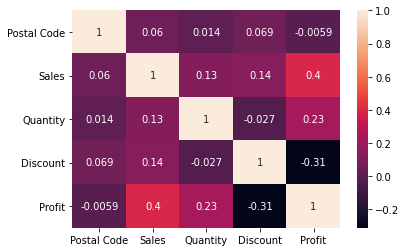

In [ ]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

##**From the graphs below we can see the frequency of various different criterions**

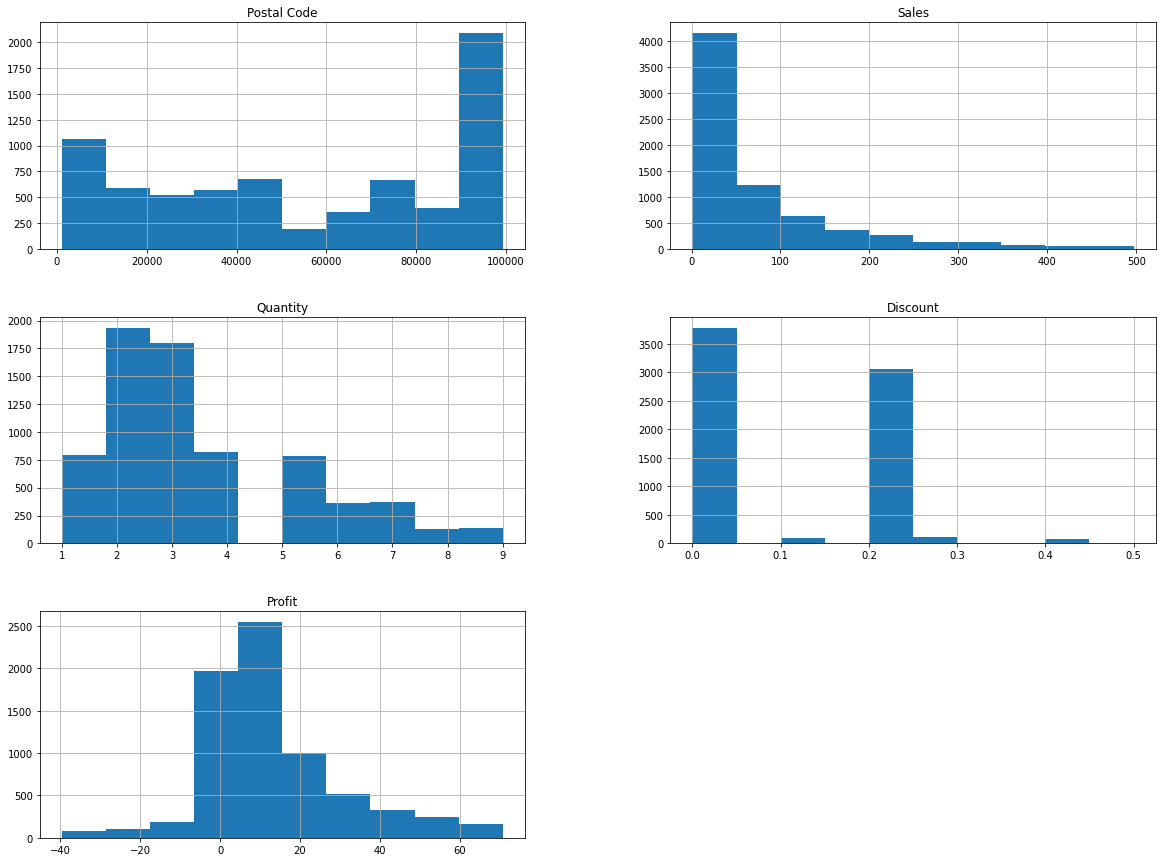

In [ ]:
df.hist(figsize=(20,15))
plt.show()

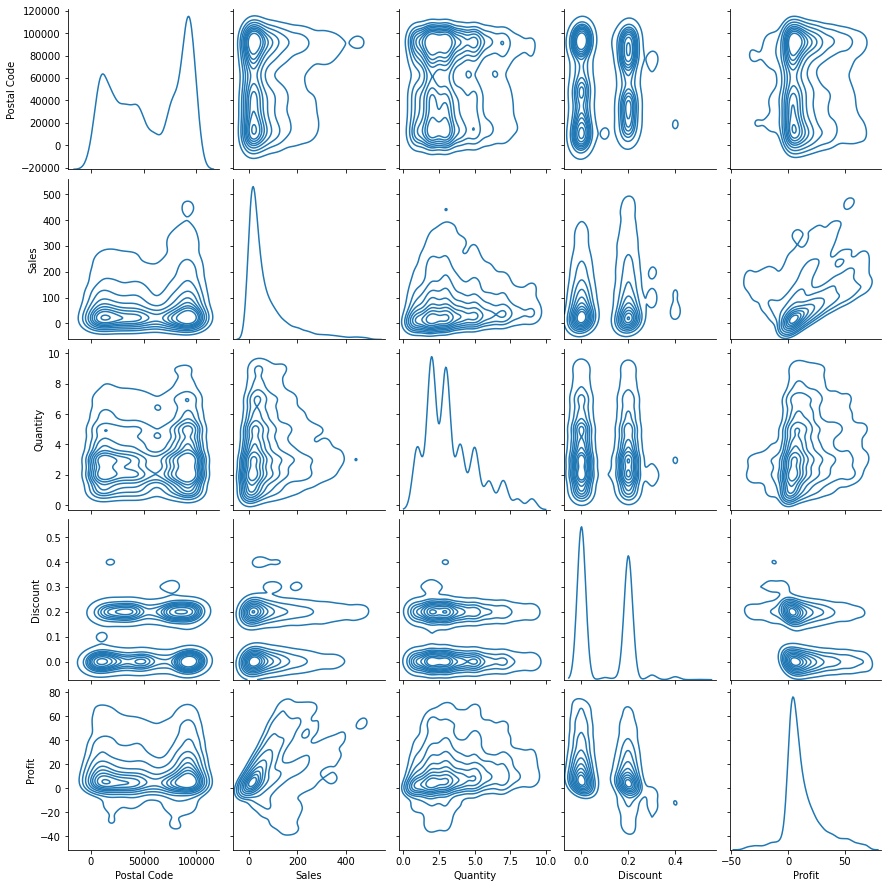

In [ ]:
sns.pairplot(data=df,
             kind='kde',
             diag_kws=dict(fill=False))
plt.show()


####**1:  The pie chart below show the region wise sales of a particular super store based in USA. We can see that the Southern region experiences the least number of sales while the Eastern region has the maximum. In contrast to this it can be seen that profits for Central region is the least which means that business strategy for that region needs to be adjusted.**

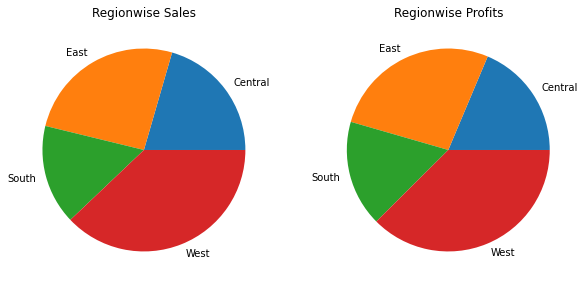

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
g1 = df.groupby('Region')['Sales'].sum()
g2 = df.groupby('Region')['Profit'].sum()
ax[0].pie(g1, labels=g1.index)
ax[1].pie(g2, labels=g2.index)
ax[0].set(title='Regionwise Sales')
ax[1].set(title='Regionwise Profits')
plt.show()

###**A stacked bar graph to better show how they relate**

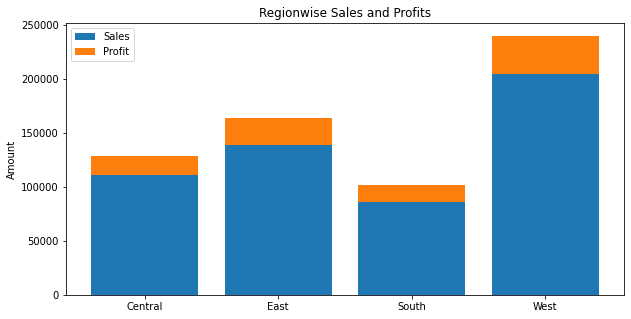

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
gb1 = plt.bar([0, 1, 2, 3], g1)
gb2 = plt.bar([0, 1, 2, 3], g2, bottom=g1)

plt.ylabel('Amount')
plt.title('Regionwise Sales and Profits')
plt.xticks([0, 1, 2, 3], ('Central', 'East', 'South', 'West'))
plt.legend((gb1[0], gb2[0]), ('Sales', 'Profit'))

plt.show()


###**On further investigation of the problem, we can see that maximum discounts are being by the central branch which is leading to a decrease in the profit margins even though the sales volume is pretty high. Discounts offered in the central branches need to be reduced**

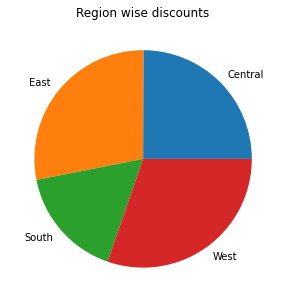

In [ ]:
df.groupby('Region')['Discount'].sum().plot(kind='pie', title='Region wise discounts', ylabel='', figsize=(10,5))
plt.show()

###**Next we will check the sales/profit per shop of each individual region**
####As we can see frm the graph below, sales wise the most efficient region is the southern region which indicates that although their volume of sales and profit is less, they are working better per shop than the other branches. Meanwhile profit wise the most efficient branch is the western region which is the best region for efficiency as their profit per shop is highest even though their sales are third highest. Compared to them the central branch is doing very poorly especially on profit on a per shop basis and need to be managed in a better way

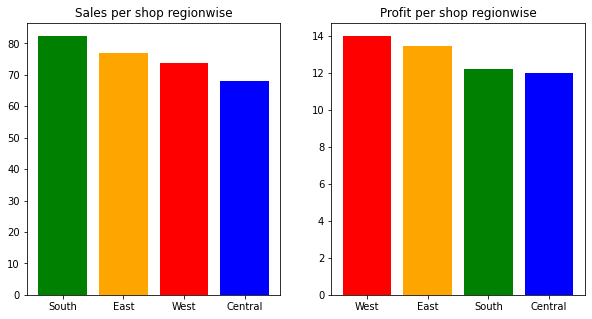

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
n1 = df.groupby('Region')['Sales'].sum() / df.groupby('Region')['State'].count()  
n2 = df.groupby('Region')['Profit'].sum() / df.groupby('Region')['State'].count()
n1 = n1.sort_values(ascending=False)
n2 = n2.sort_values(ascending=False)
ax[0].bar(['South', 'East', 'West', 'Central'], n1, color= ['green', 'orange', 'red', 'blue'])
ax[0].set(title='Sales per shop regionwise')
ax[1].bar(['West', 'East', 'South', 'Central'], n2, color= ['red', 'orange', 'green', 'blue'])
ax[1].set(title='Profit per shop regionwise')
plt.show()


In [ ]:
sub_category = df.groupby('Category')['Category'].count()
sub_category

Category
Furniture          1262
Office Supplies    4670
Technology         1195
Name: Category, dtype: int64

In [ ]:
segment = df.groupby('Segment')['Segment'].count()
segment

Segment
Consumer       3725
Corporate      2137
Home Office    1265
Name: Segment, dtype: int64

In [ ]:
ship_mode = df.groupby('Ship Mode')['Ship Mode'].count()
ship_mode

Ship Mode
First Class       1098
Same Day           385
Second Class      1405
Standard Class    4239
Name: Ship Mode, dtype: int64

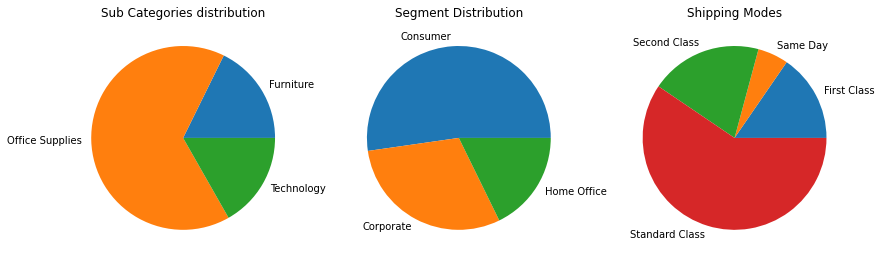

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
ax[0].pie(sub_category, labels=sub_category.index)
ax[1].pie(segment, labels=segment.index)
ax[2].pie(ship_mode, labels=ship_mode.index)
ax[0].set(title='Sub Categories distribution')
ax[1].set(title='Segment Distribution')
ax[2].set(title='Shipping Modes')
plt.show()

In [ ]:
w1 = df.groupby('Segment')['Quantity'].sum()
w2 = df.groupby('Ship Mode')['Quantity'].sum()
w3 = df.groupby('Category')['Quantity'].sum()
x1 = df.groupby('Segment')['Sales'].sum()
x2 = df.groupby('Ship Mode')['Sales'].sum()
x3 = df.groupby('Category')['Sales'].sum()
y1 = df.groupby('Segment')['Discount'].sum()
y2 = df.groupby('Ship Mode')['Discount'].sum()
y3 = df.groupby('Category')['Discount'].sum()
z1 = df.groupby('Segment')['Profit'].sum()
z2 = df.groupby('Ship Mode')['Profit'].sum()
z3 = df.groupby('Category')['Profit'].sum()

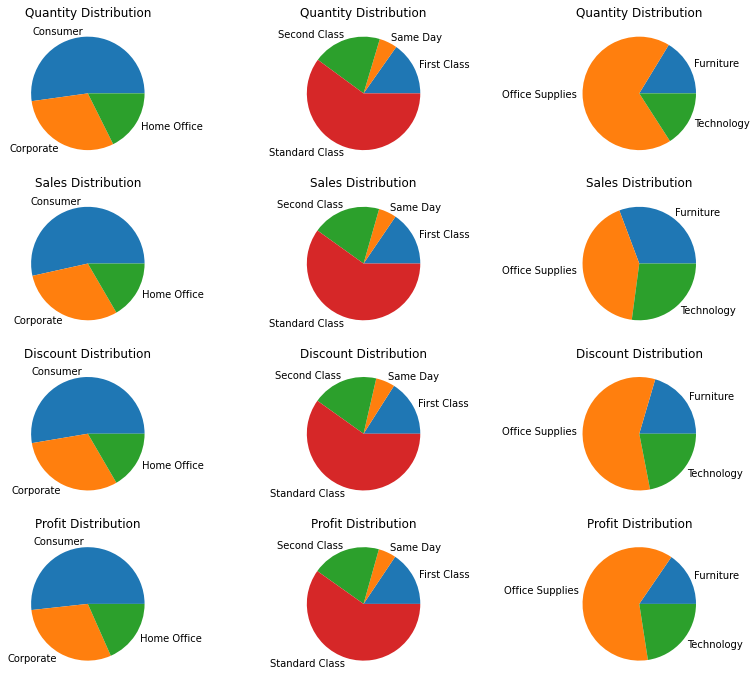

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
ax[0][0].pie(w1, labels=w1.index)
ax[0][1].pie(w2, labels=w2.index)
ax[0][2].pie(w3, labels=w3.index)
ax[1][0].pie(x1, labels=x1.index)
ax[1][1].pie(x2, labels=x2.index)
ax[1][2].pie(x3, labels=x3.index)
ax[2][0].pie(y1, labels=y1.index)
ax[2][1].pie(y2, labels=y2.index)
ax[2][2].pie(y3, labels=y3.index)
ax[3][0].pie(z1, labels=z1.index)
ax[3][1].pie(z2, labels=z2.index)
ax[3][2].pie(z3, labels=z3.index)
for i in range(3):
  ax[0][i].set(title='Quantity Distribution')
  ax[1][i].set(title='Sales Distribution')
  ax[2][i].set(title='Discount Distribution')
  ax[3][i].set(title='Profit Distribution')
plt.show()